In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Money_Laundering_Dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1.0,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,2.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,3.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,4.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df = df.drop('Unnamed: 0',axis=1)


In [5]:
df.duplicated().sum()#didnt found any duplicate values so im proceeding to check null values

0

In [6]:
df.isnull().sum() # found null values doing mode imputation 

step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
# Mode Imputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["step"] = pd.DataFrame(mode_imputer.fit_transform(df[['step']]))
df["oldbalanceOrg"] = pd.DataFrame(mode_imputer.fit_transform(df[['oldbalanceOrg']]))
df["newbalanceOrig"] = pd.DataFrame(mode_imputer.fit_transform(df[['newbalanceOrig']]))
df["oldbalanceDest"] = pd.DataFrame(mode_imputer.fit_transform(df[['oldbalanceDest']]))
df["isFraud"] = pd.DataFrame(mode_imputer.fit_transform(df[['isFraud']]))
df["isFlaggedFraud"] = pd.DataFrame(mode_imputer.fit_transform(df[['isFlaggedFraud']]))


In [9]:
df.isnull().sum() 

step               0
type               0
amount             0
nameOrig          10
oldbalanceOrg      0
newbalanceOrig     0
nameDest           4
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
dtype: int64

In [10]:
df = df.drop(['nameOrig','nameDest'],axis = 1)

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [13]:
columns = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']

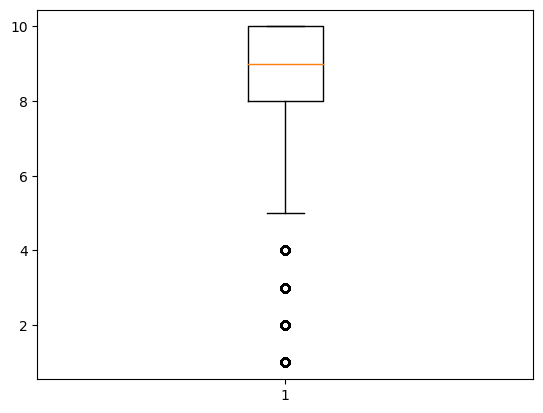

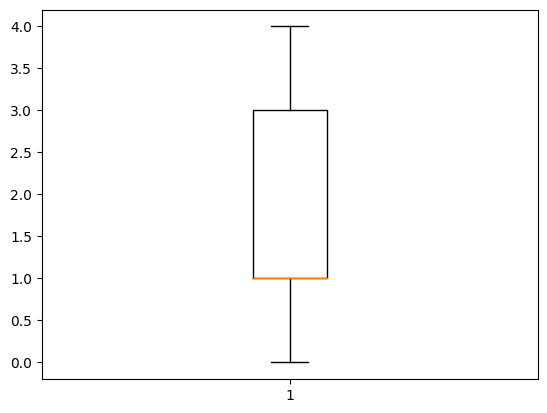

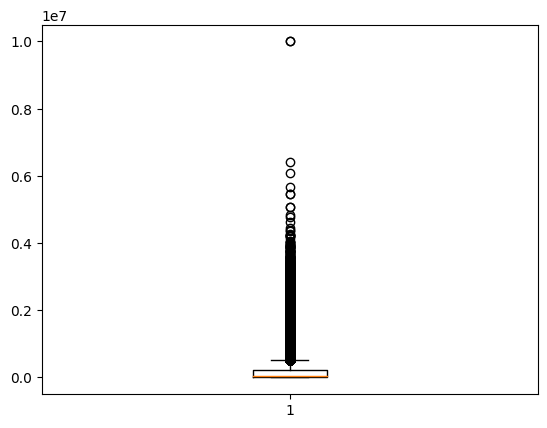

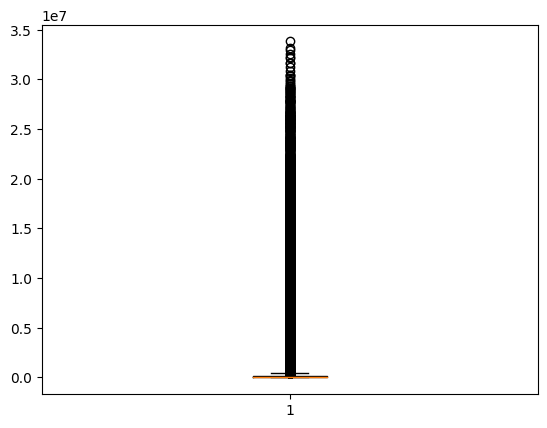

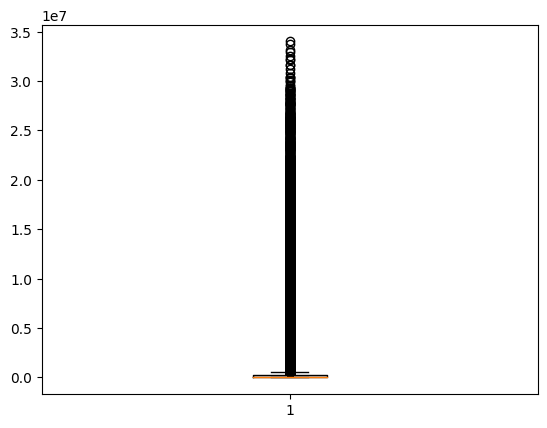

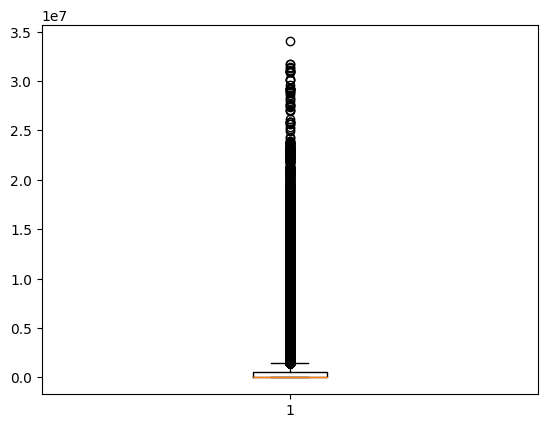

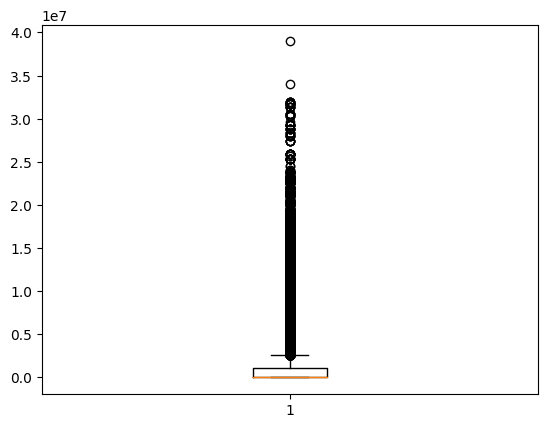

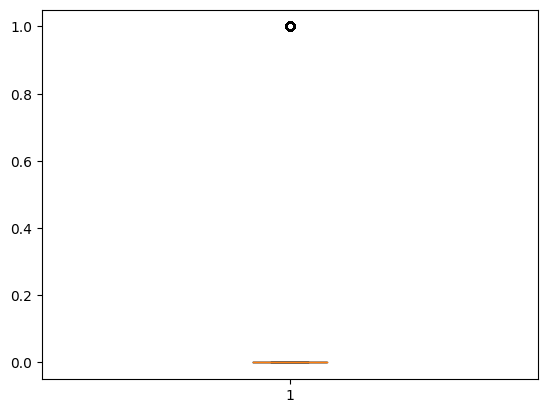

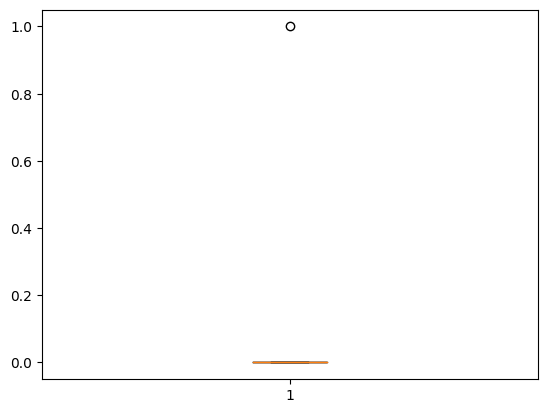

In [14]:
for c in columns:
    plt.figure()
    plt.boxplot(df[c])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  float64
 1   type            100000 non-null  int32  
 2   amount          100000 non-null  float64
 3   oldbalanceOrg   100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   oldbalanceDest  100000 non-null  float64
 6   newbalanceDest  100000 non-null  float64
 7   isFraud         100000 non-null  float64
 8   isFlaggedFraud  100000 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 6.5 MB


In [16]:
#not doing outlier treatment because this is a transactional data dont want to lose money values

In [17]:

# doing normalization
from sklearn.preprocessing import RobustScaler

In [18]:
scaler = RobustScaler()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('isFraud',axis =1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  float64
 1   type            100000 non-null  int32  
 2   amount          100000 non-null  float64
 3   oldbalanceOrg   100000 non-null  float64
 4   newbalanceOrig  100000 non-null  float64
 5   oldbalanceDest  100000 non-null  float64
 6   newbalanceDest  100000 non-null  float64
 7   isFlaggedFraud  100000 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 5.7 MB


In [22]:
y = df['isFraud']

In [23]:
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [25]:
X_train[0]

array([ 0.        ,  0.        ,  0.27380423,  6.24848029,  0.        ,
       15.8348807 , 10.40564381,  0.        ])

In [26]:
!pip install catboost
from catboost import CatBoostClassifier

In [27]:
model = CatBoostClassifier(random_state=42, class_weights={0:1, 1:12}, silent=True)

In [28]:
model.fit(X_train,y_train)

In [29]:
y_pred_cat = model.predict(X_test)


In [30]:
print("Accuracy on testing data = ",model.score(X_test,y_test))


Accuracy on testing data =  0.9934545454545455


In [31]:
print("Accuracy on training data = ",model.score(X_train,y_train))


Accuracy on training data =  0.9980597014925373


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()


In [34]:
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
lr.score(X_test,y_test)

0.9963333333333333

In [36]:
lr.score(X_train,y_train)

0.9956417910447761

In [37]:
from xgboost import XGBClassifier
xgb_cv = XGBClassifier(n_estimators=100)

In [38]:
xgb_cv.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
xgb_cv.score(X_test,y_test)

0.9965757575757576

In [40]:
xgb_cv.score(X_train,y_train)

0.9980597014925373

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU


In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
X_train.shape

(67000, 8)

In [44]:
classifier = Sequential()
classifier.add(Dense(units=8, activation = 'relu'))

In [45]:
#hidden layers
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dense(units=3,activation='relu'))


In [46]:
#outputlayer
classifier.add(Dense(1,activation='sigmoid'))

In [47]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [48]:
mod = classifier.fit(X_train,y_train,epochs=12)

Epoch 1/12
2094/2094 [==============================] - 3s 1ms/step - loss: 0.0670 - accuracy: 0.9956
Epoch 2/12
2094/2094 [==============================] - 2s 873us/step - loss: 0.0228 - accuracy: 0.9956
Epoch 3/12
2094/2094 [==============================] - 2s 856us/step - loss: 0.0218 - accuracy: 0.9956
Epoch 4/12
2094/2094 [==============================] - 2s 768us/step - loss: 0.0215 - accuracy: 0.9956
Epoch 5/12
2094/2094 [==============================] - 2s 841us/step - loss: 0.0212 - accuracy: 0.9956
Epoch 6/12
2094/2094 [==============================] - 2s 946us/step - loss: 0.0212 - accuracy: 0.9956
Epoch 7/12
2094/2094 [==============================] - 2s 773us/step - loss: 0.0211 - accuracy: 0.9956
Epoch 8/12
2094/2094 [==============================] - 2s 876us/step - loss: 0.0211 - accuracy: 0.9956
Epoch 9/12
2094/2094 [==============================] - 2s 837us/step - loss: 0.0209 - accuracy: 0.9956
Epoch 10/12
2094/2094 [==============================] - 2s 731us/

In [49]:
y_pred=classifier.predict(X_test)

1032/1032 [==============================] - 1s 486us/step


In [50]:
y_pred

array([[0.00013768],
       [0.00107846],
       [0.0020575 ],
       ...,
       [0.00287192],
       [0.0014677 ],
       [0.00082491]], dtype=float32)

In [51]:
classifier.evaluate(X_test,y_test)

1032/1032 [==============================] - 1s 557us/step - loss: 0.0181 - accuracy: 0.9963


[0.018091149628162384, 0.9963333606719971]

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [53]:
dtc.score(X_test,y_test)

0.9933333333333333

In [54]:
dtc.score(X_train,y_train)

1.0

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [56]:
rfc.score(X_test,y_test)

0.9962424242424243

In [57]:
rfc.score(X_train,y_train)

1.0

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [59]:
svc.score(X_test,y_test)

0.9963333333333333

In [60]:
svc.score(X_train,y_train)

0.9956417910447761

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [62]:
knn.score(X_test,y_test)

0.9959090909090909

In [63]:
knn.score(X_train,y_train)

0.9958358208955224

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [65]:
gnb.score(X_test,y_test)

0.9381818181818182

In [66]:
gnb.score(X_train,y_train)

0.9384925373134329

In [67]:
import pickle

In [68]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'